## Economic Indicators with Datastream

Datastream is the world’s leading time-series database, enabling strategists, economists, and research communities’ access to the most comprehensive financial information available. With histories back to the 1950s, you can explore relationships between data series; perform correlation analysis, test investment and trading ideas, and research countries, regions, and industries.

The Datastream database has over 35 million individual instruments or indicators across major asset classes. You can directly invoke the web service methods from your own applications by using metadata information we publish.

The Datastream Web Service allows direct access to historical financial time series content listed below:

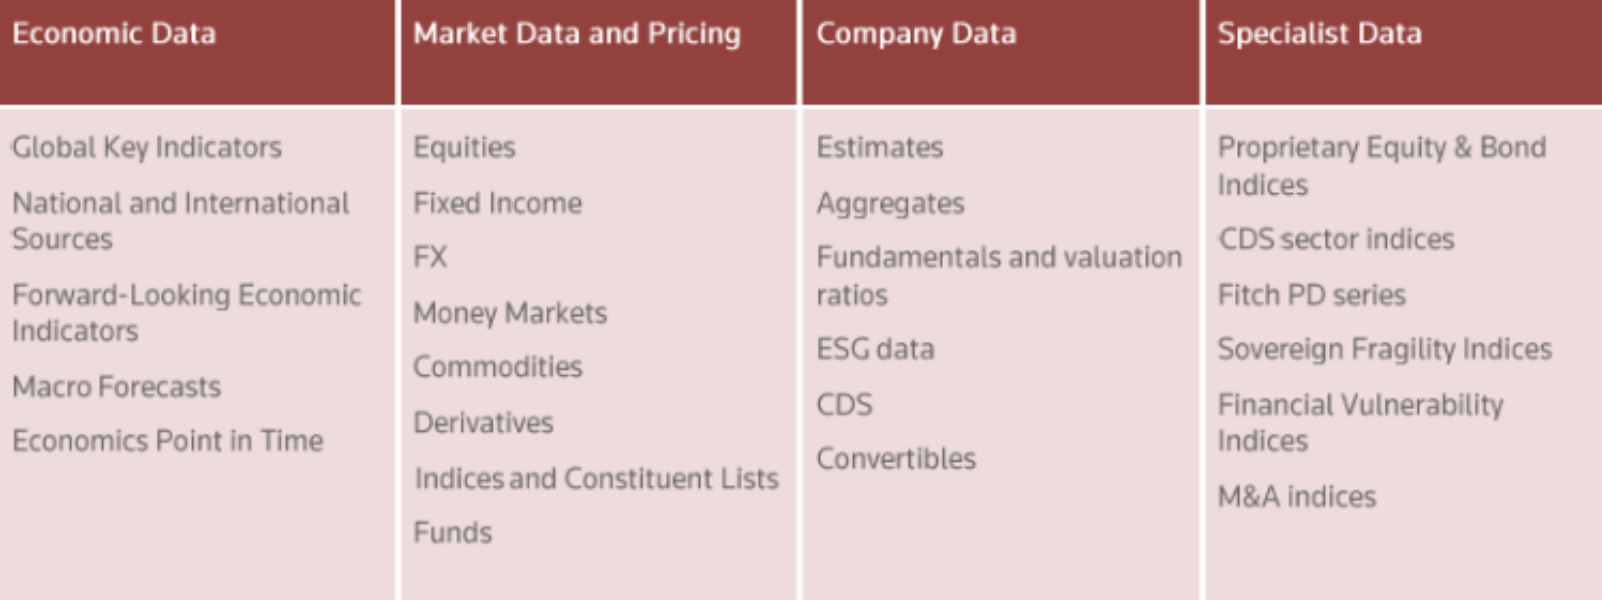

#### Learn more

To learn more about the Datastream Web Service (DSWS) API please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like
 [Overview](https://developers.lseg.com/en/api-catalog/eikon/datastream-web-service),
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/eikon/datastream-web-service/Quickstart), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/eikon/datastream-web-service/Tutorials), 
 [Documentation](https://developers.lseg.com/en/api-catalog/eikon/datastream-web-service/Documents)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/251/index.html). 
The LSEG Developer Community will be happy to help. 

----

### Example

In this section, I will walk through a DataStream Web Service example used to retrieve economic indicators by countries. The example uses the DatastreamDSWS library to connect and retrieve data from Datastream. To use this Python library, please refer to the Getting Started with Python document.

Loading Libraries
The required packages for this example are:

DataStreamDSWS: Python API package for Refinitiv Datastream Webservice

pandas: Powerful data structures for data analysis, time series, and statistics

ipywidgets: IPython HTML widgets for Jupyter

IPython.display: Public API for display tools in IPython


In [1]:
import DatastreamPy as dsws
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Dropdown, Label
from IPython.display import display

pd.options.plotting.backend = "plotly"
ds=dsws.DataClient(username='YourID',password='YourPwd')

### Loading an Instrument List
In Datastream, the economic indicators are available under the Economics category. The data can be filtered by countries.

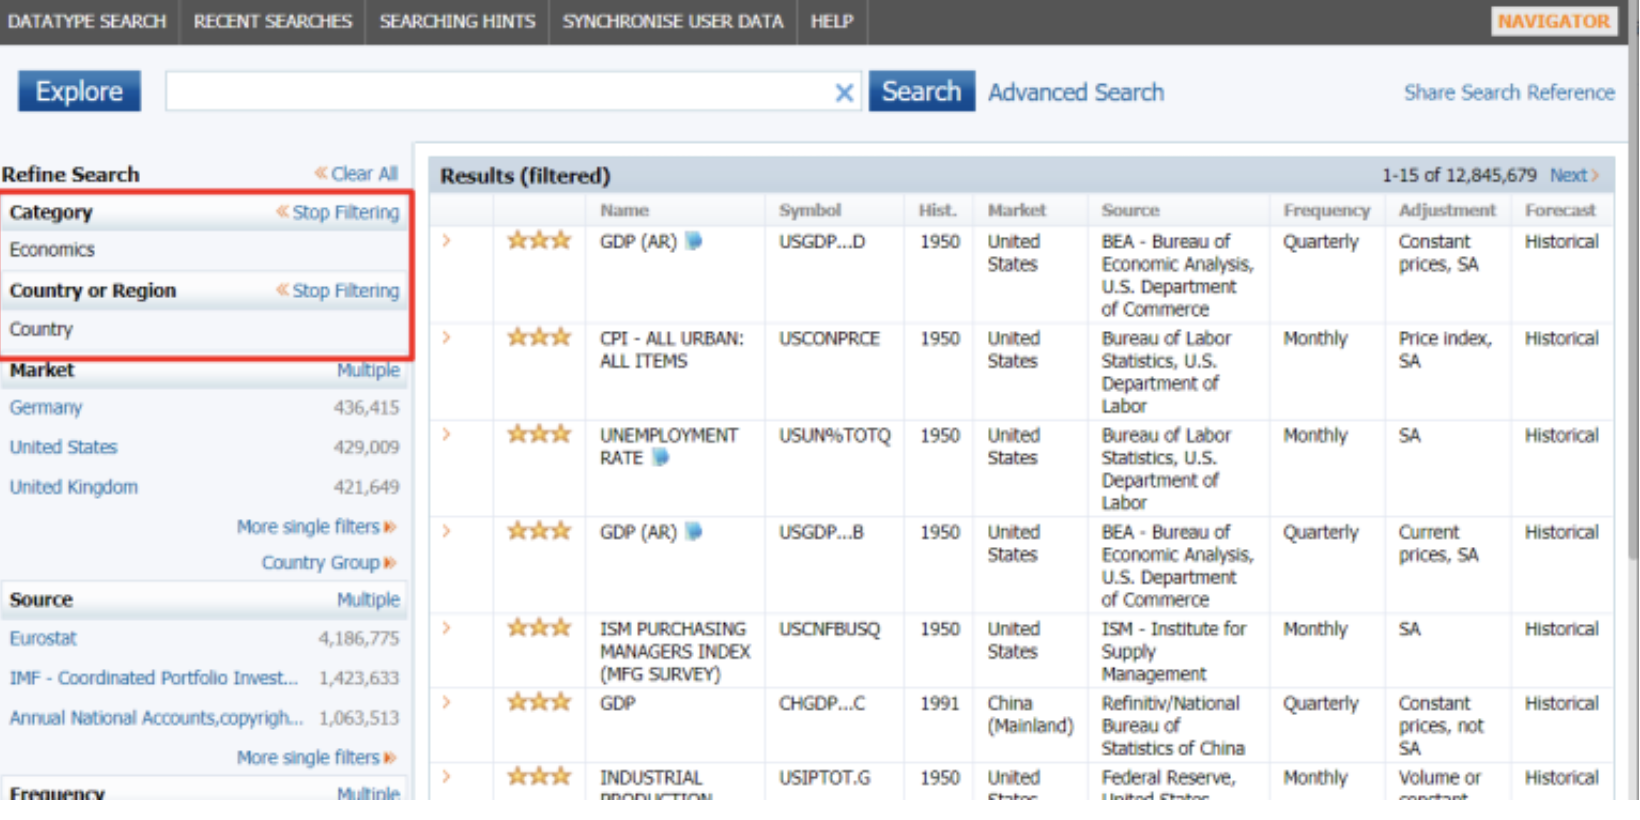

<img src="attachment:74be8402-61a6-4ae7-a417-1fce2c1e682d.png" alt="image" style="width: 200px; height: auto;">

A table on the right displays all economic data available in Datastream. 

In this example, we only focus on active key indicators so we add two filters (Activity and Key Indicator) to refine the search result.

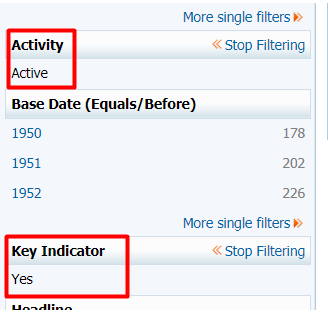

From the search results, there are around 8,600 active key indicators. 

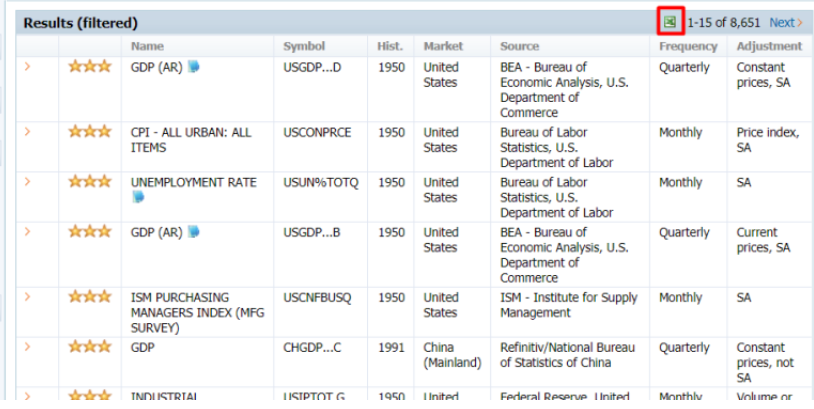

After that, the search results can be downloaded to an excel file (ActiveKeyIndicators.xls). This excel file can be read into a data frame object by calling the pandas.read_html method. In the data frame:

The Name column contains short indicator names

The Symbol column contains instrument names used by Datastream to retrieve data

The Market column contains country names

The Full Name column contains full indicator names

The Frequency column contains the frequency of the time-series data

In [2]:
df = pd.read_html('ActiveKeyIndicators.xls')
df[0][["Name","Symbol","Market","Full Name","Frequency"]]

,Name,Symbol,Market,Full Name,Frequency
0,GDP (AR),USGDP...D,United States,"United States, National Product Account, Gross...",Quarterly
1,CPI - ALL URBAN: ALL ITEMS,USCONPRCE,United States,"United States, All Urban Consumers, United Sta...",Monthly
2,UNEMPLOYMENT RATE,USUN%TOTQ,United States,"United States, Unemployed, Rate, Total, SA",Monthly
3,GDP (AR),USGDP...B,United States,"United States, National Product Account, Gross...",Quarterly
4,ISM PURCHASING MANAGERS INDEX (MFG SURVEY),USCNFBUSQ,United States,"United States, Business Surveys, Institute for...",Monthly
...,...,...,...,...,...
8646,UNEMPLOYMENT RATE - MONTEVIDEO,UYUN%TM.R,Uruguay,"Uruguay, Unemployed Rate - Montevideo (Suspended)",Monthly
8647,UNEMPLOYMENT RATE - MONTEVIDEO (3-MONTH AVERAGE),UYUN%TMQR,Uruguay,"Uruguay, Unemployed Rate - Montevideo (3-Month...",Quarterly
8648,WAGE GROWTH RATE: REAL TERMS (SUSP.),CPWAGES%,Cyprus,"Cyprus, Wage Growth Rate : Real Terms (Suspended)",Annual
8649,WAGE IN LARGE & MEDIUM-SIZED ENTERPRISES (CCPY...,TMWAGES.F,Turkmenistan,"Turkmenistan, Wage in Large and Medium-Sized E...",Quarterly


### Economic Indicators By Countries

In this section, we will create a widget that allows users to display available economic indicators by selecting a country. First, it sets the display.max_rows option to 200 to increase the maximum number of rows and columns displayed by the data frame.

The widget displays a list of countries including the number of indicators in the dropdown list. After selecting a country, the economic indicators in that country are displayed.

In [3]:
pd.set_option('display.max_rows', 200)

class ListAllECIByCountryWidget:
    status_label = Label("")
    title_label = Label(value='')
    linebreak_label = Label('')
    button = Button(description='Select')
    output = widgets.Output()

    def __init__(self, _context):
        country_count = _context.groupby(["Market"])["Symbol"].count()
        self.country_dropdown = Dropdown(options=[(index+" ("+str(value)+")", index) for index, value in country_count.items()], value='United States', description='Country:')
        display(HBox([self.country_dropdown,self.button]),
                self.output)
        self.button.on_click(self.on_button_clicked)
        self._context = _context

    def on_button_clicked(self,c):
        with self.output:
            self.output.clear_output() #clear and update output
            self.title_label.value = r'\(\underline{\textbf{%s}}\)'%(self.country_dropdown.value)
            display(VBox([ HBox([self.linebreak_label]),
                          HBox([self.title_label])
                        ]))
            display(self._context[self._context["Market"]==self.country_dropdown.value].set_index('Symbol')[["Name","Start Date","End Date","Frequency","Source","Full Name"]])

ListAllECIByCountryWidget(df[0])

Output()

### Historical Economic Indicators By Countries

In this section, we will create a widget that displays historical data of a selected economic indicator. First, users need to select a country. Then, the widget creates a dropdown list containing economic indicators available in the selected country.

After selecting the economic indicator, the widget calls the get_data method in the DataStreamDSWS library to retrieve the unit of the historical data.

ds.get_data(tickers=symbol, fields=["ESUNT"],kind=0)

The symbol represents the Datastream symbol of the selected economic indicator. The ESUNT data type gives the unit quotation of the series. For example, the unit quotation of the United States Gross Domestic Product (USGDP...A) is USD BIL.
Next, the widget calls the get_data method again to retrieve the historical data.

ds.get_data(tickers=symbol, start='BDATE',freq=freq)

The BDATE is the base date representing the date from which Datastream holds information about the issue. The freq parameter is the frequency of historical data. It could be D (Daily), W (Weekly), M (Monthly), Q (Quarterly), and Y (Annual). The widget gets the frequency of the selected economic indicator from the Frequency column in the data frame. For example, the quarterly historical data of United States Gross Domestic Product (USGDP...A) since BDATE (1 Jan 1950) is shown below.

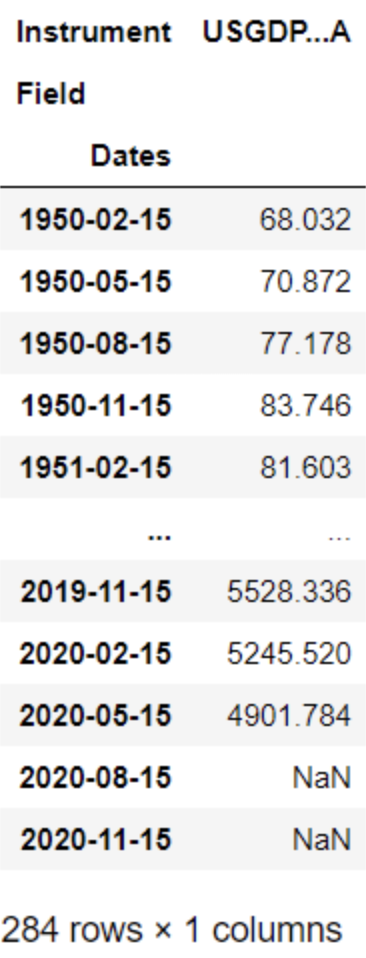

Finally, the widget calls the iplot method to plot a chart.

In [ ]:
class HistoricalECIWidget:
    status_label = Label("")
    eci_dropdown = Dropdown()
    eci_dropdown.description = "Economic:"
    status_label = Label("")
    title_label = Label(value='')
    linebreak_label = Label('')
    button = Button(description='Select')
    output = widgets.Output()

    def __init__(self, _context):
        country_count = _context.groupby(["Market"])["Symbol"].count()
        self.country_dropdown = Dropdown(options=[(index+" ("+str(value)+")", index) for index, value in country_count.items()], value='United States', description='Country:')

        display(HBox([self.country_dropdown]),
                HBox([self.eci_dropdown,self.button]),
                self.title_label,
                self.status_label,
                self.output)

        self.button.on_click(self.on_button_clicked)
        self._context = _context.set_index("Symbol")
        tuple_list = self._context[self._context["Market"]==self.country_dropdown.value].sort_values(by=['Name'])[["Full Name"]].to_records(index=True).tolist()
        self.eci_dropdown.options = [t[::-1] for t in tuple_list]
        self.country_dropdown.observe(self.on_country_change)

    def _get_frequency(self, freq):
        switcher={
            'Daily':'D',
            'Weekly':'W',
            'Monthly':'M',
            'Quarterly': 'Q',
            'Annual': 'Y'
        }

        if freq in switcher:
            return switcher[freq]
        else:
            return None

    def on_button_clicked(self,c):
        with self.output:
            self.output.clear_output()
            symbol = self.eci_dropdown.value
            title = self._context.loc[symbol,"Full Name"]
            self.title_label.value = r'\(\underline{\textbf{%s}}\)'%(title)
            temp_unit = ds.get_data(tickers=symbol, fields=["ESUNT"],kind=0)
            unit = temp_unit.iloc[0,2]
            freq = self._get_frequency(self._context.loc[symbol,"Frequency"])
            if freq==None:
                self.status_label.value = "Unable to match a frequence: " + self._context.loc[symbol,"Frequency"]
                return
            display(self._context.loc[[symbol],["Name","Start Date","End Date","Frequency","Source"]])
            df1 = ds.get_data(tickers='UKCONPRCF', fields='X',start='BDATE',freq=freq)
            df1.columns = df1.columns.get_level_values(0)
            display(df1.plot(title=title)) 
    
    def on_country_change(self, change):
        with self.output:
            self.eci_dropdown.options = []
            tuple_list = self._context[self._context["Market"]==self.country_dropdown.value].sort_values(by=['Full Name'])[["Full Name"]].to_records(index=True).tolist()
            self.eci_dropdown.options = [t[::-1] for t in tuple_list]

HistoricalECIWidget(df[0])